In [95]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

plt.style.use('ggplot') 
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 5)})


In [75]:
gg = pd.read_csv('/Users/shuangxu/Documents/Data Set/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates = ['Date'])
ms = pd.read_csv('/Users/shuangxu/Documents/Data Set/MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])


In [76]:
gg.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [77]:
ms.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,26.25,27.00,26.10,26.84,79974418,MSFT
2006-01-04,26.77,27.08,26.77,26.97,57975661,MSFT
2006-01-05,26.96,27.13,26.91,26.99,48247610,MSFT
2006-01-06,26.89,27.00,26.49,26.91,100969092,MSFT
2006-01-09,26.93,27.07,26.76,26.86,55627836,MSFT


Text(0.5, 1.0, '2008 - 2010 Google Stock Price Attributes')

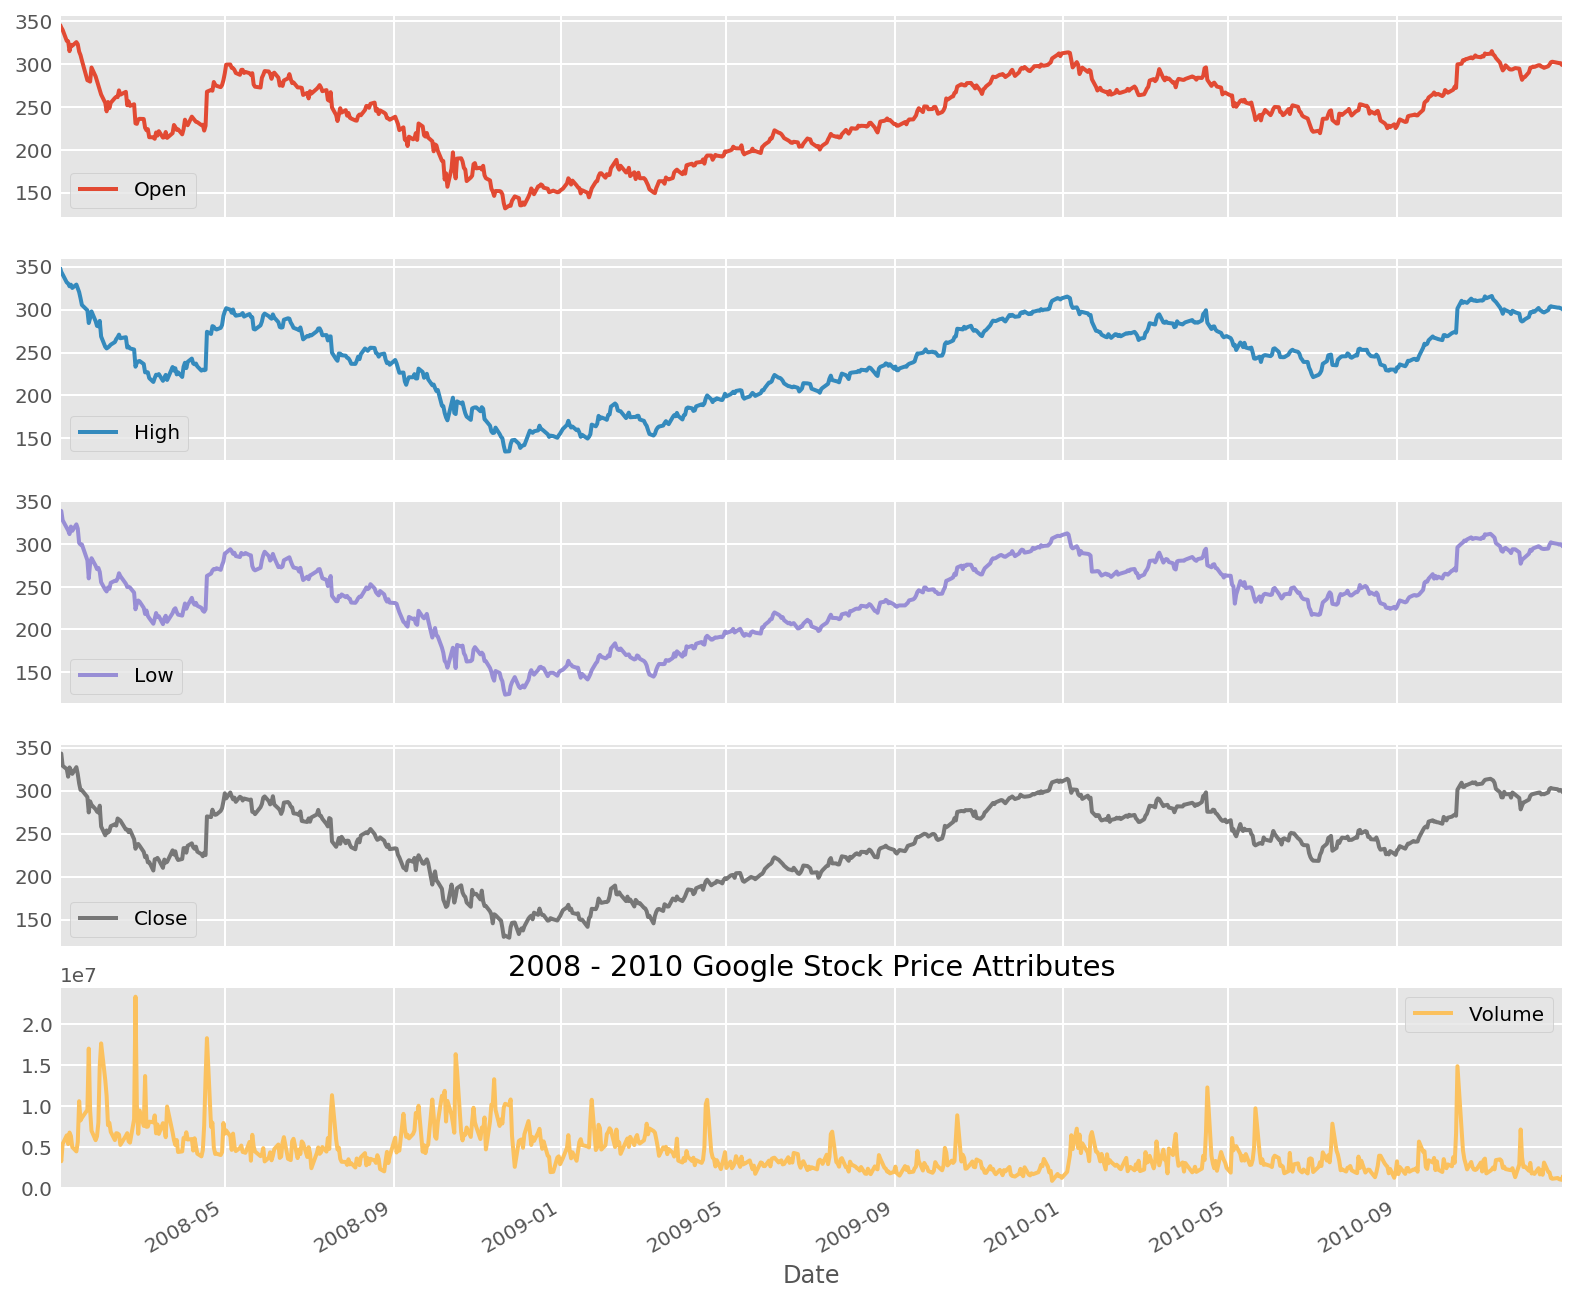

In [78]:
gg['2008':'2010'].plot(subplots = True, figsize = (12, 12), lw = 2)
plt.title('2008 - 2010 Google Stock Price Attributes')

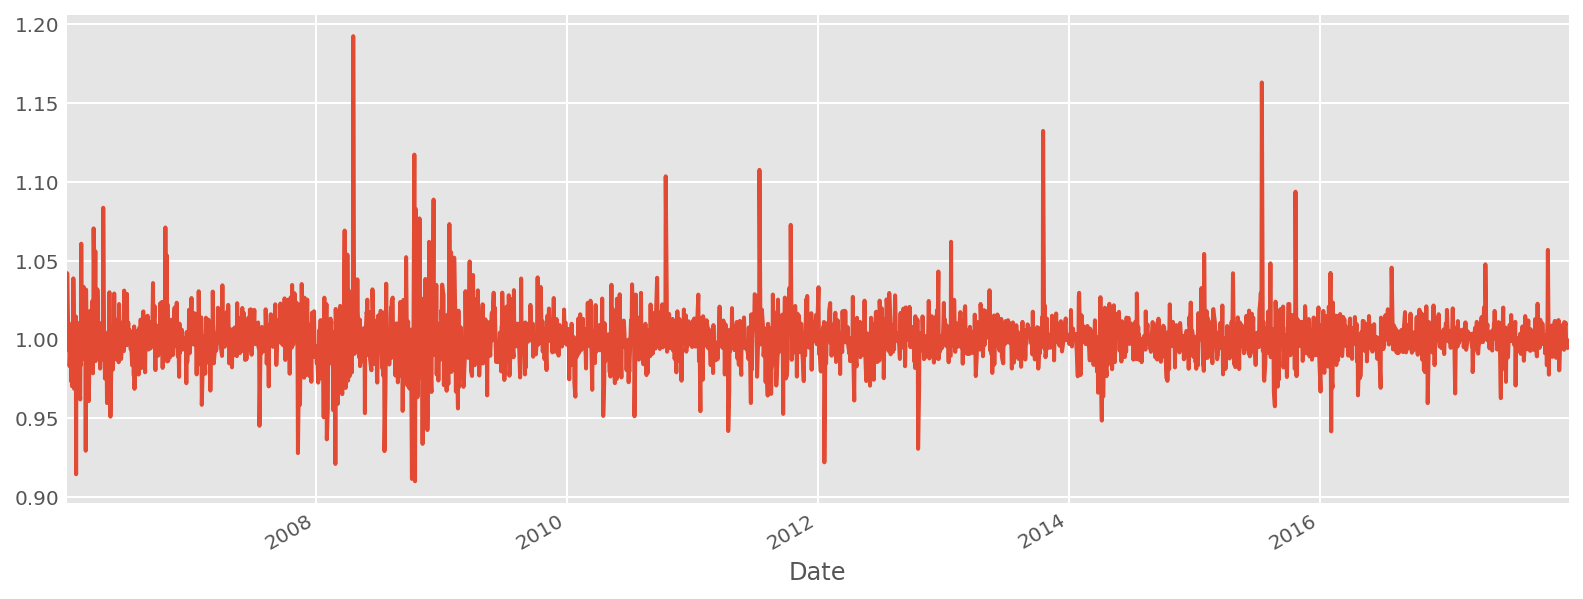

In [79]:
gg['Change'] = gg.High.div(gg.High.shift())
gg['Change'].plot(figsize = (12,5), lw = 2)

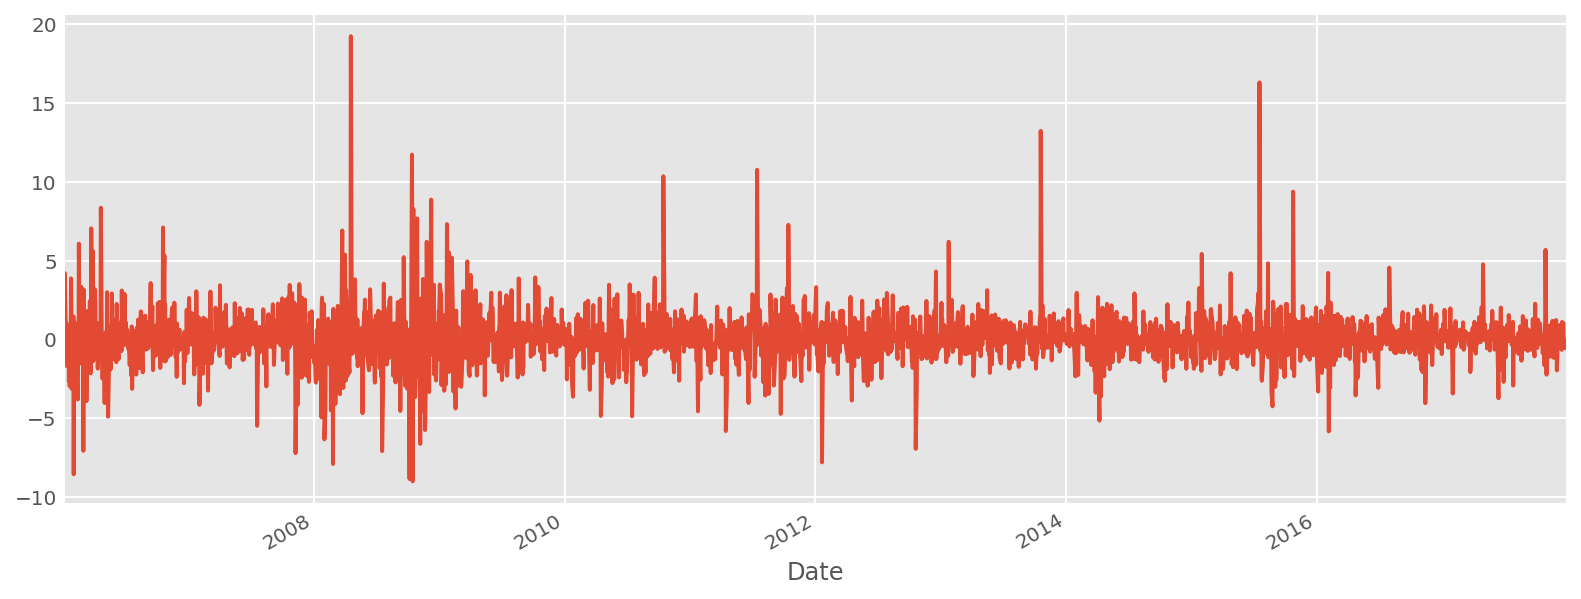

In [80]:
gg['Return%'] = gg.Change.sub(1).mul(100)
gg['Return%'].plot(figsize = (12,5), lw = 2)

In [70]:
gg.drop(['Return'], axis = 1, inplace = True)

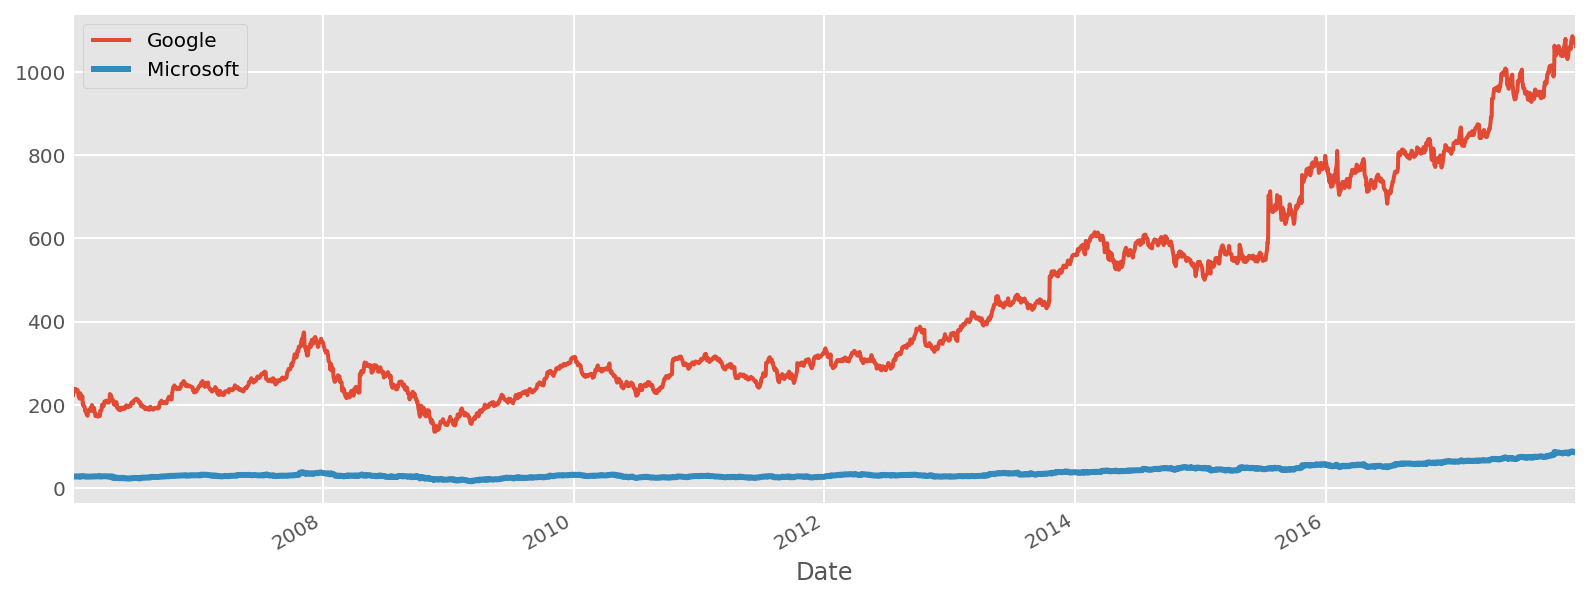

In [89]:
gg.High.plot(lw =2)
ms.High.plot(figsize = (12,5), lw =3)
plt.legend(['Google', 'Microsoft'])
plt.show()

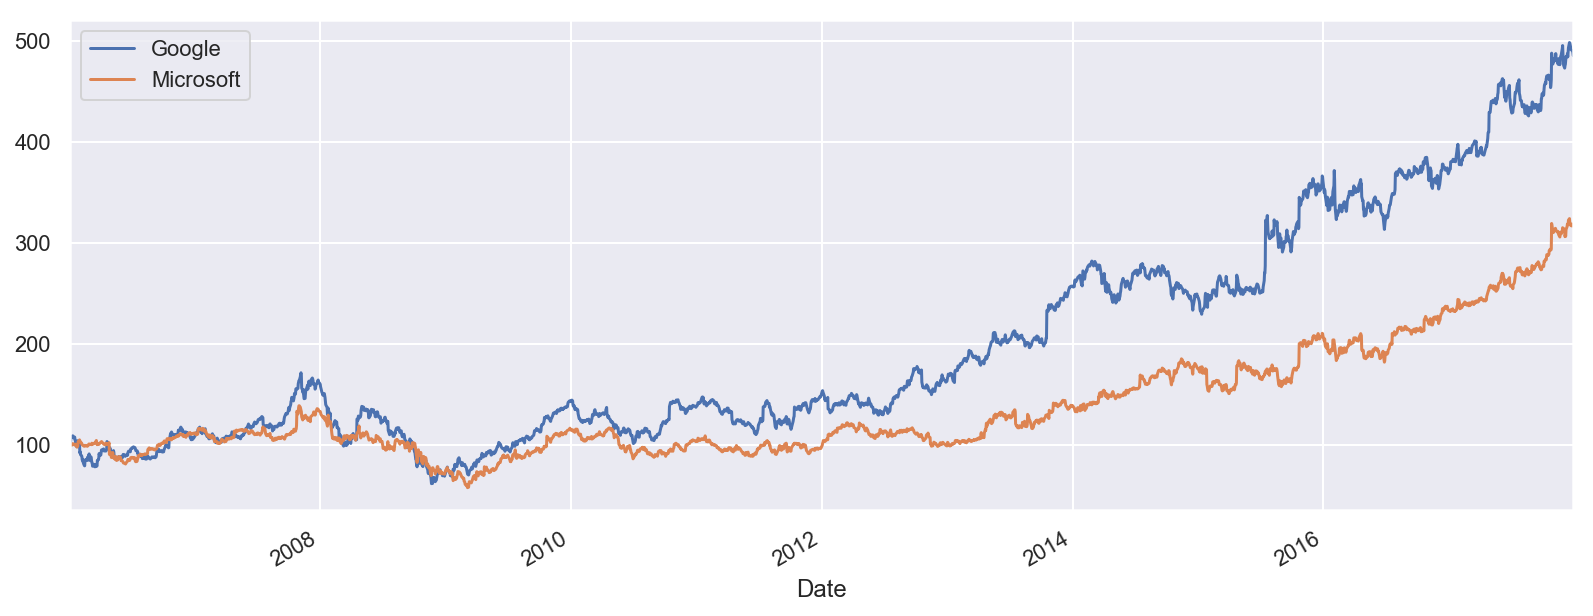

In [96]:
normalized_gg = gg.High.div(gg.High.iloc[0]).mul(100)
normalized_ms = ms.High.div(ms.High.iloc[0]).mul(100)
normalized_gg.plot()
normalized_ms.plot()
plt.legend(['Google', 'Microsoft'])
plt.show()

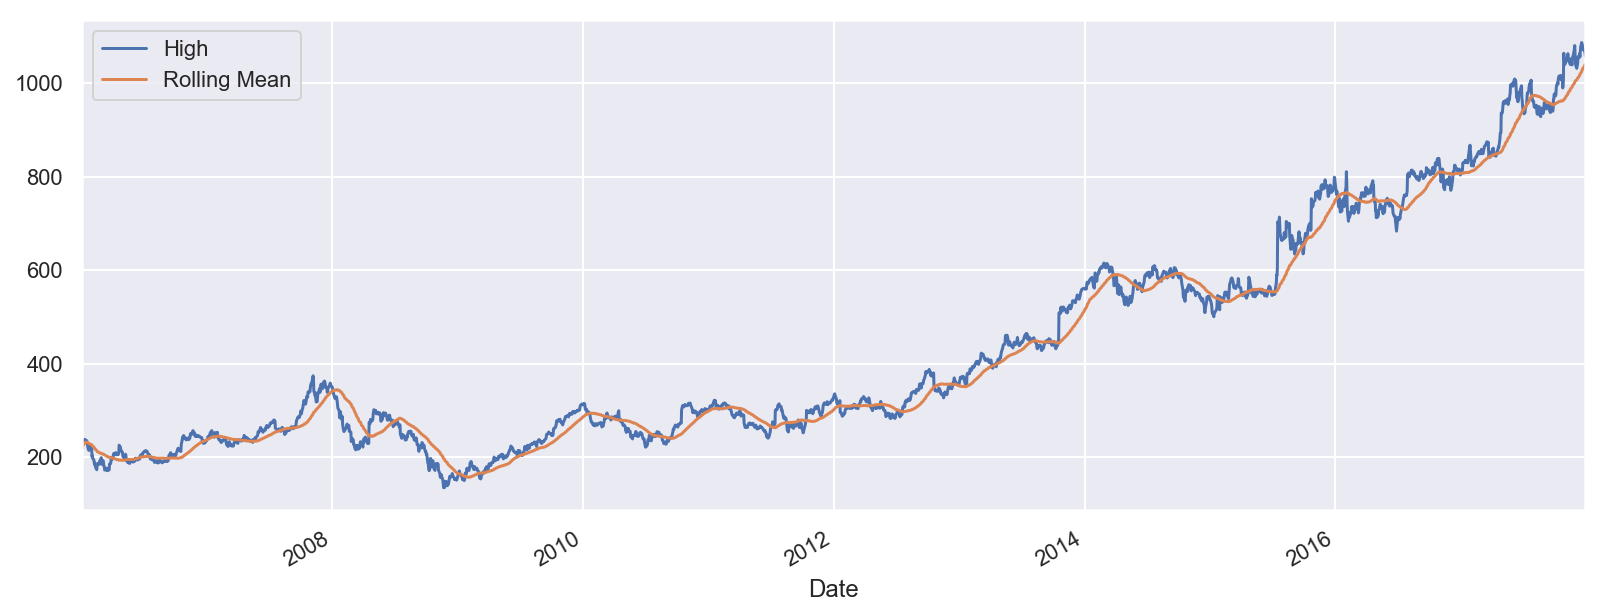

In [127]:
# Plotting a rolling mean of 90 day window with original High attributes of google stocks 

rolling_gg = gg.High.rolling('90D').mean()
gg.High.plot()
rolling_gg.plot()
plt.legend(['High', 'Rolling Mean'])

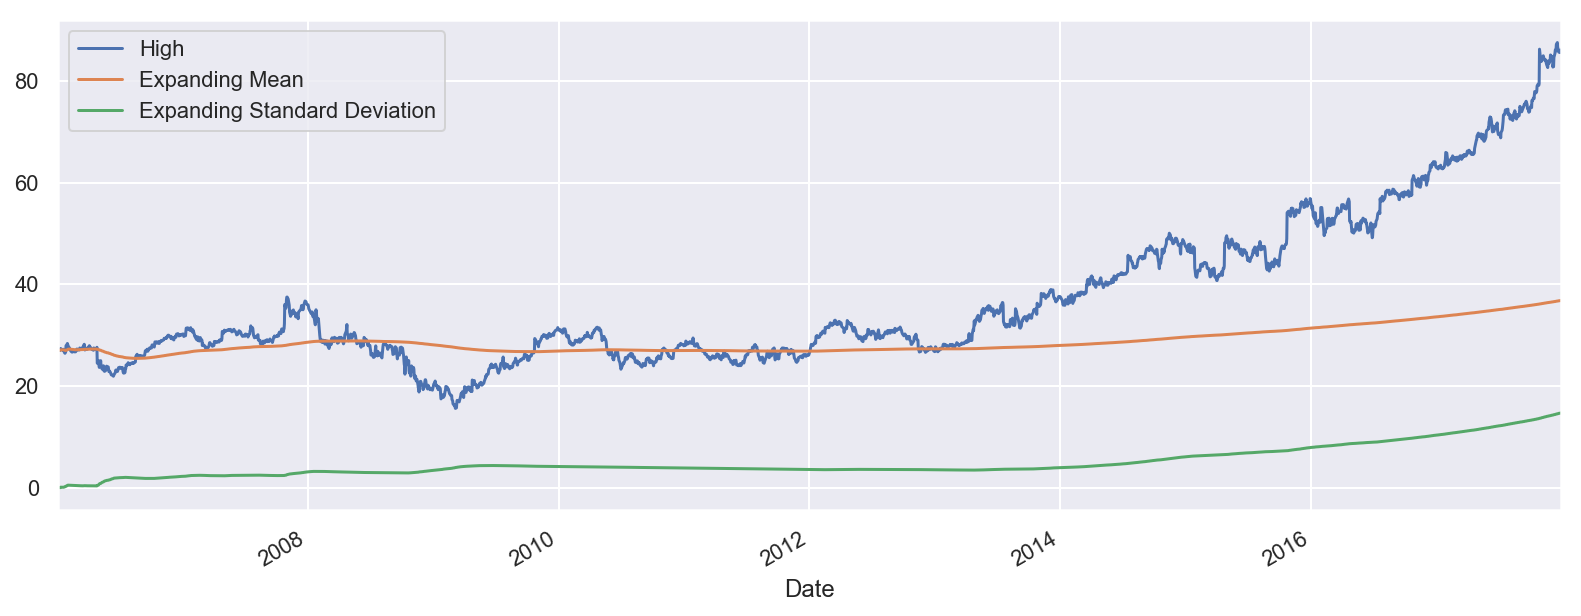

In [143]:
ms_mean = ms.High.expanding().mean()
ms_std = ms.High.expanding().std()
ms.High.plot()
ms_mean.plot()
ms_std.plot()
plt.legend(['High','Expanding Mean', 'Expanding Standard Deviation'])

In [149]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


In [160]:
trace = go.Ohlc(x = gg['2008'].index,
               open = gg['2008'].Open,
               high = gg['2008'].High,
               low = gg['2008'].Low,
               close = gg['2008'].Close)
iplot([trace])

In [161]:
trace = go.Candlestick(x = gg['2008'].index,
               open = gg['2008'].Open,
               high = gg['2008'].High,
               low = gg['2008'].Low,
               close = gg['2008'].Close)
iplot([trace])

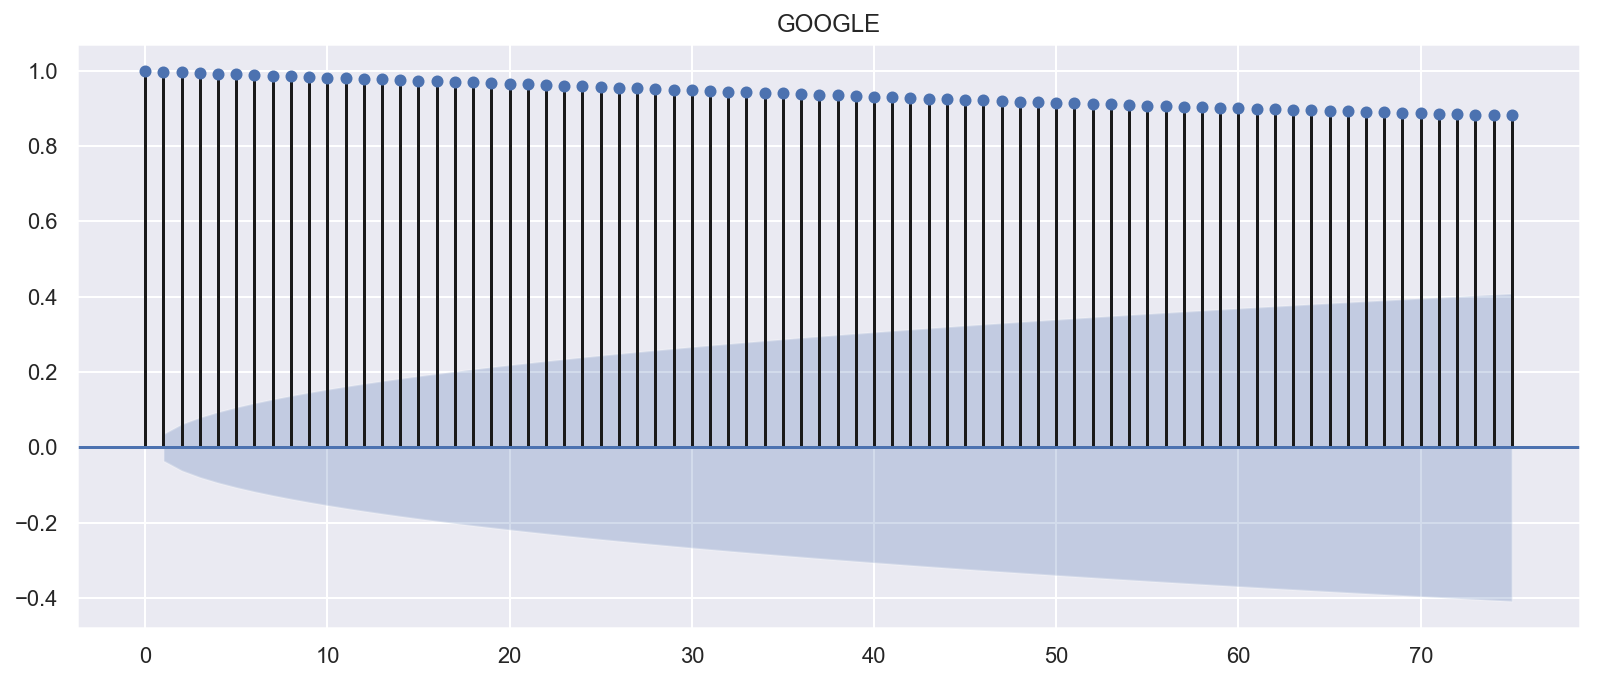

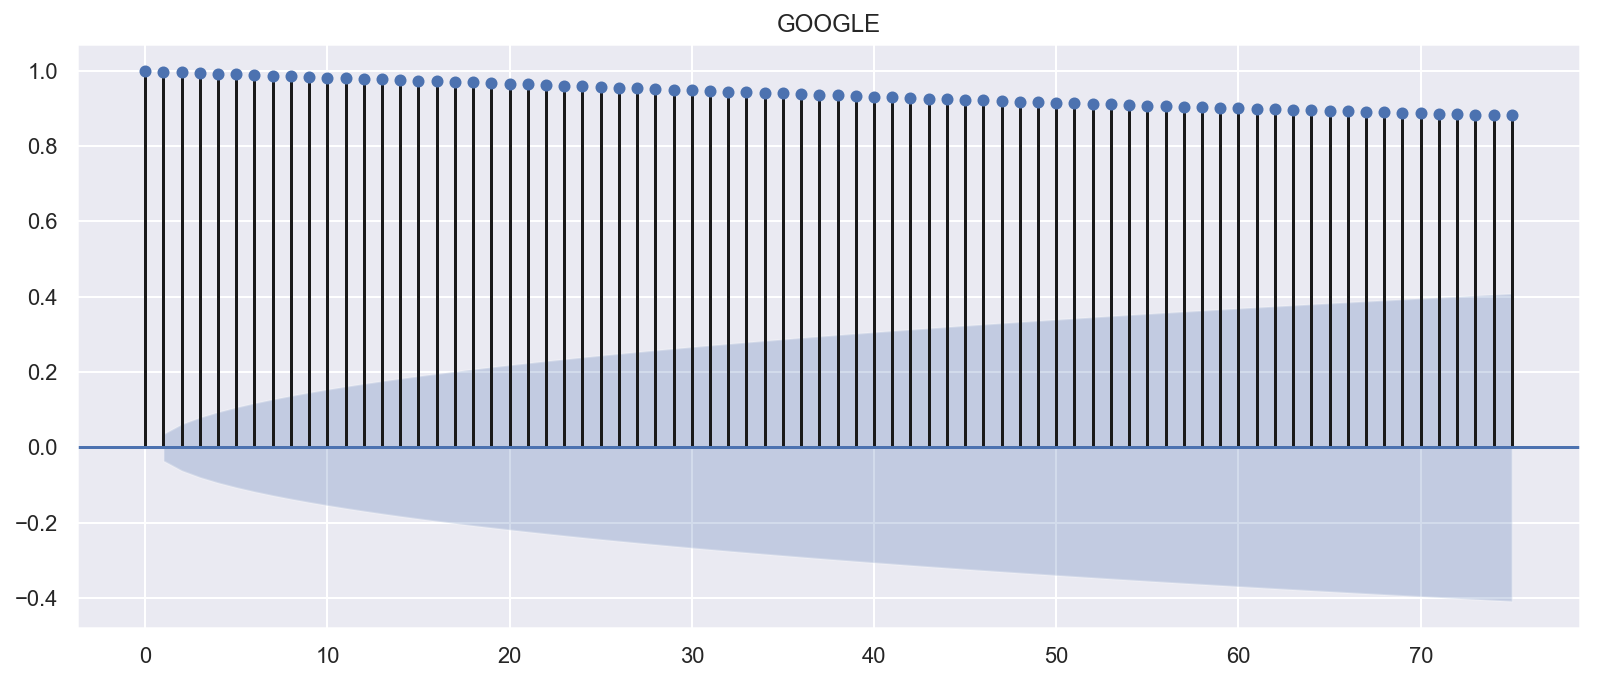

In [163]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(gg["Low"], lags=75, title="GOOGLE")

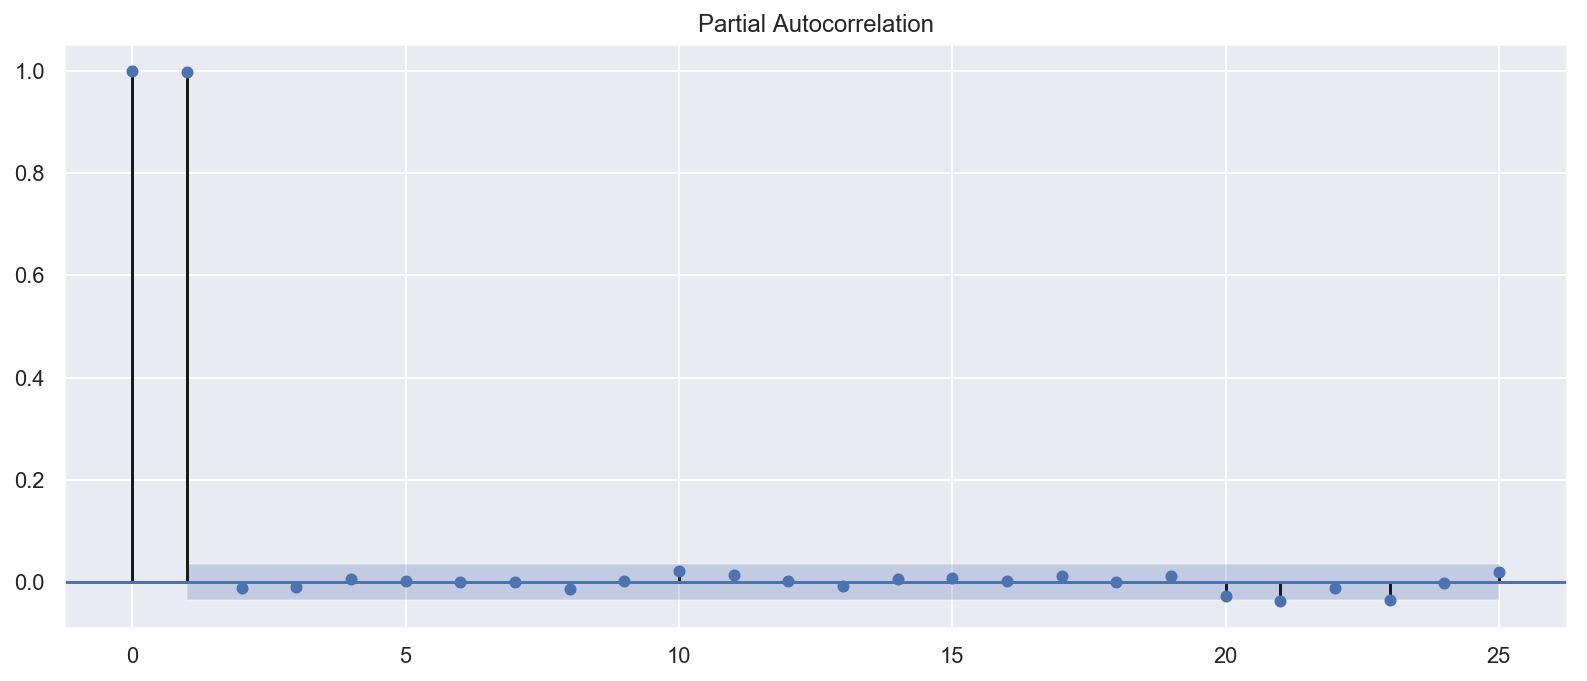

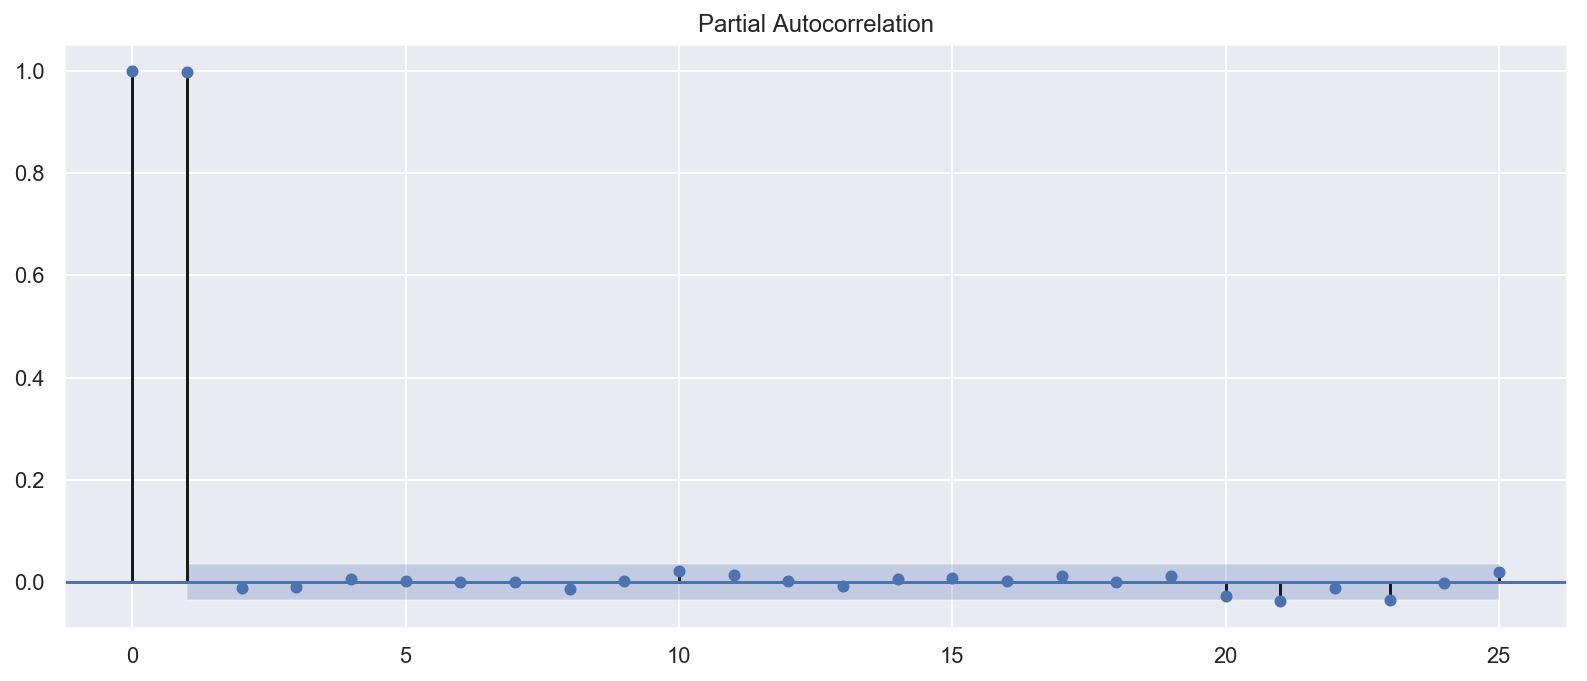

In [164]:
plot_pacf(gg["Close"],lags=25)

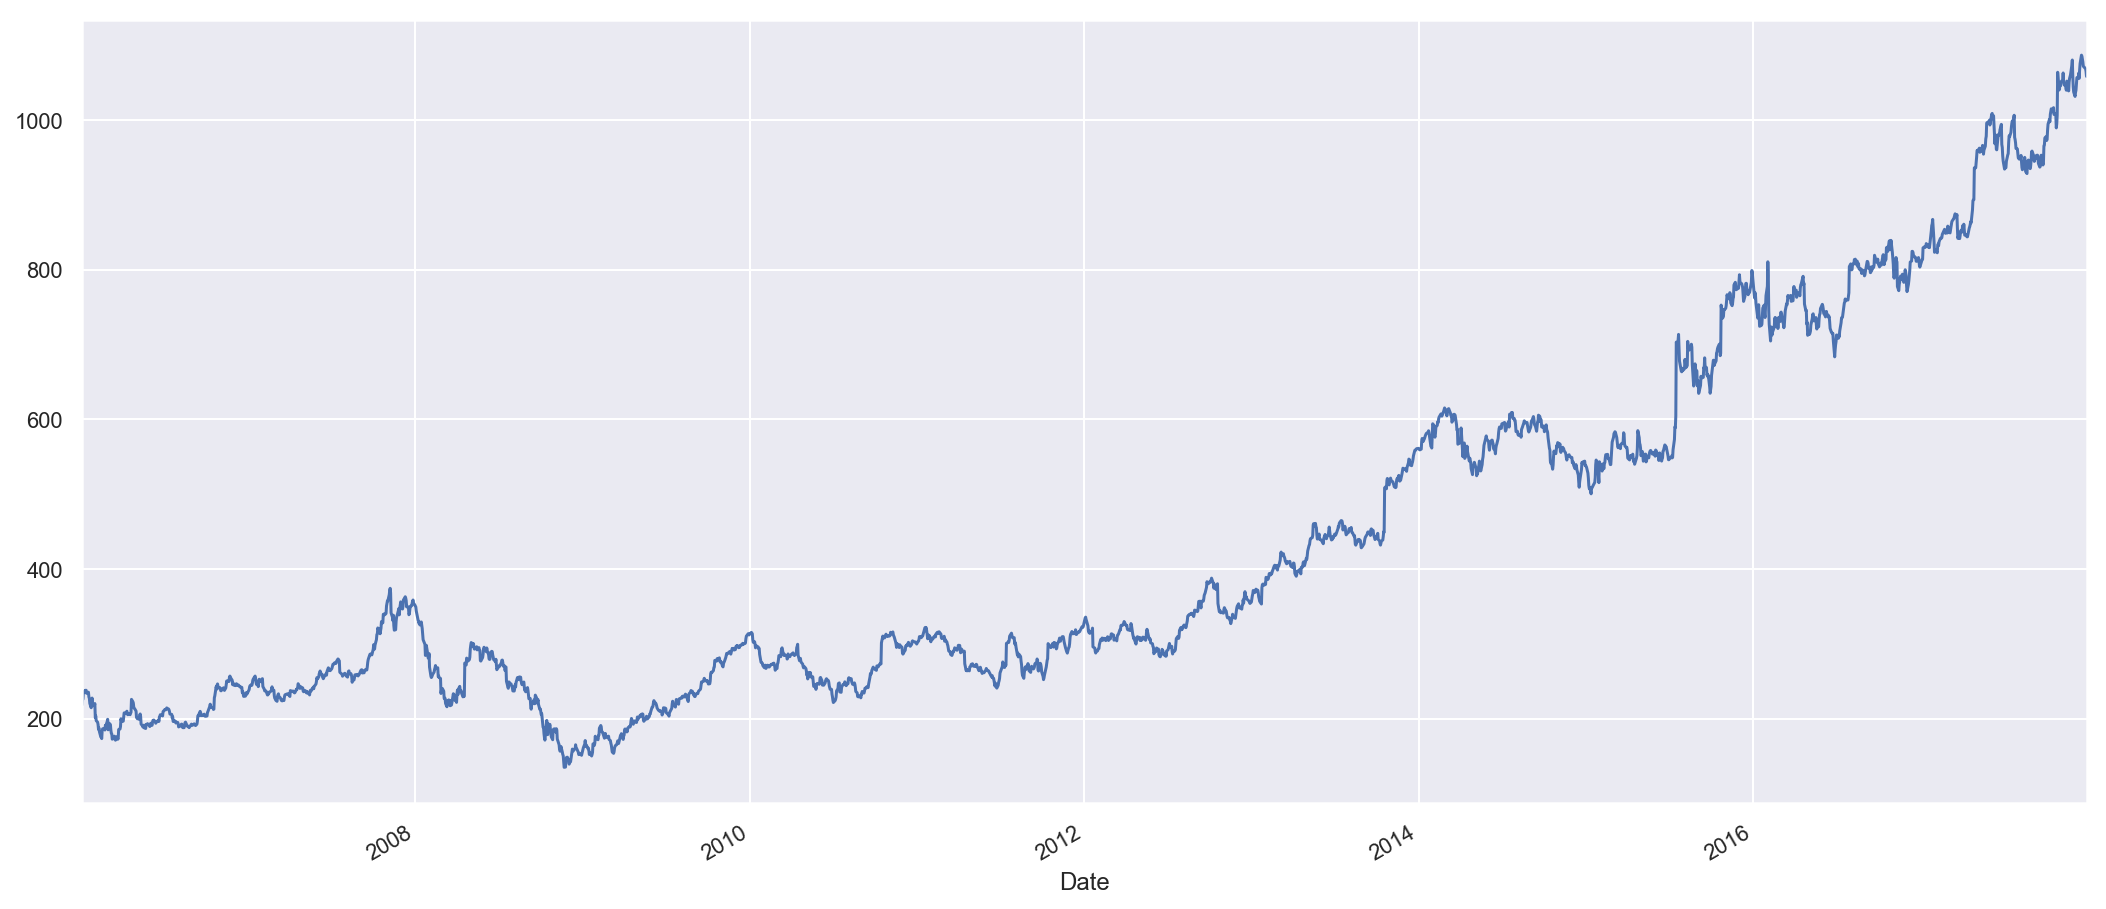

In [165]:
gg["High"].plot(figsize=(16,8))

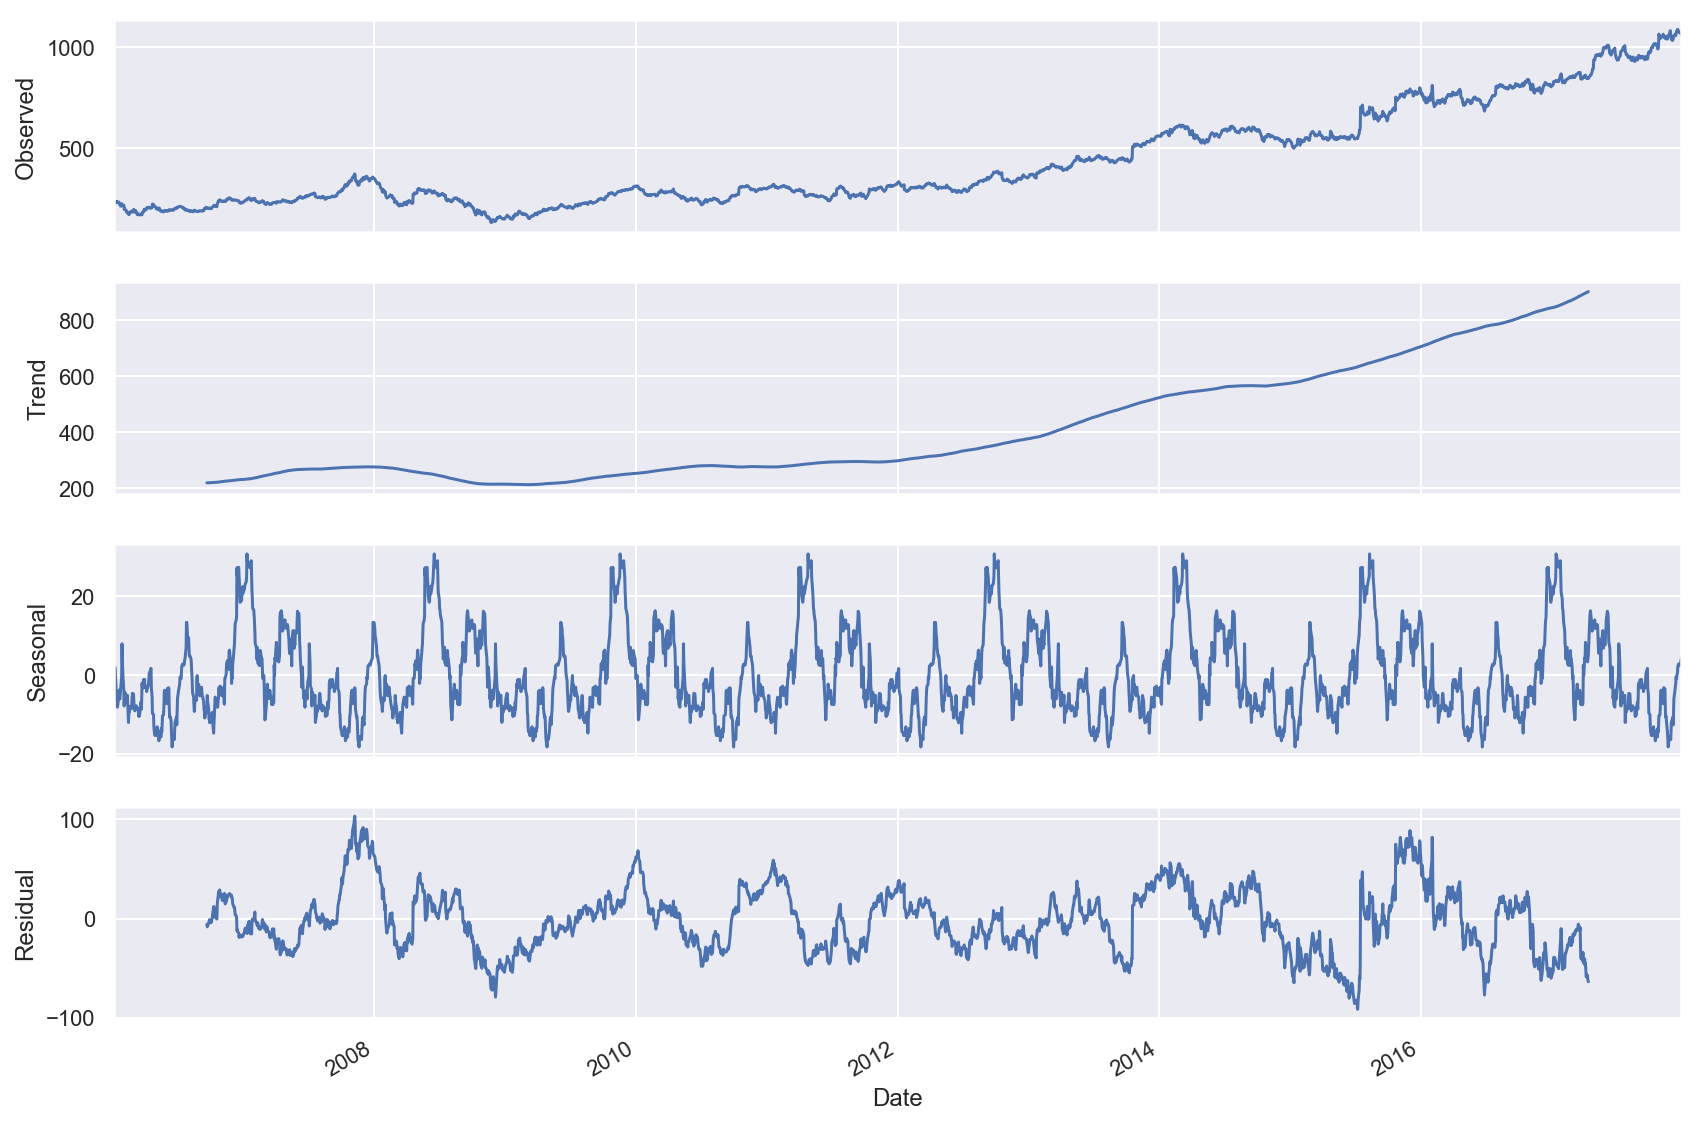

In [182]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 12, 8

decomposed_gg_volume = sm.tsa.seasonal_decompose(gg["High"], model='additive', freq=360)
decomposed_gg_volume.plot()
plt.show()

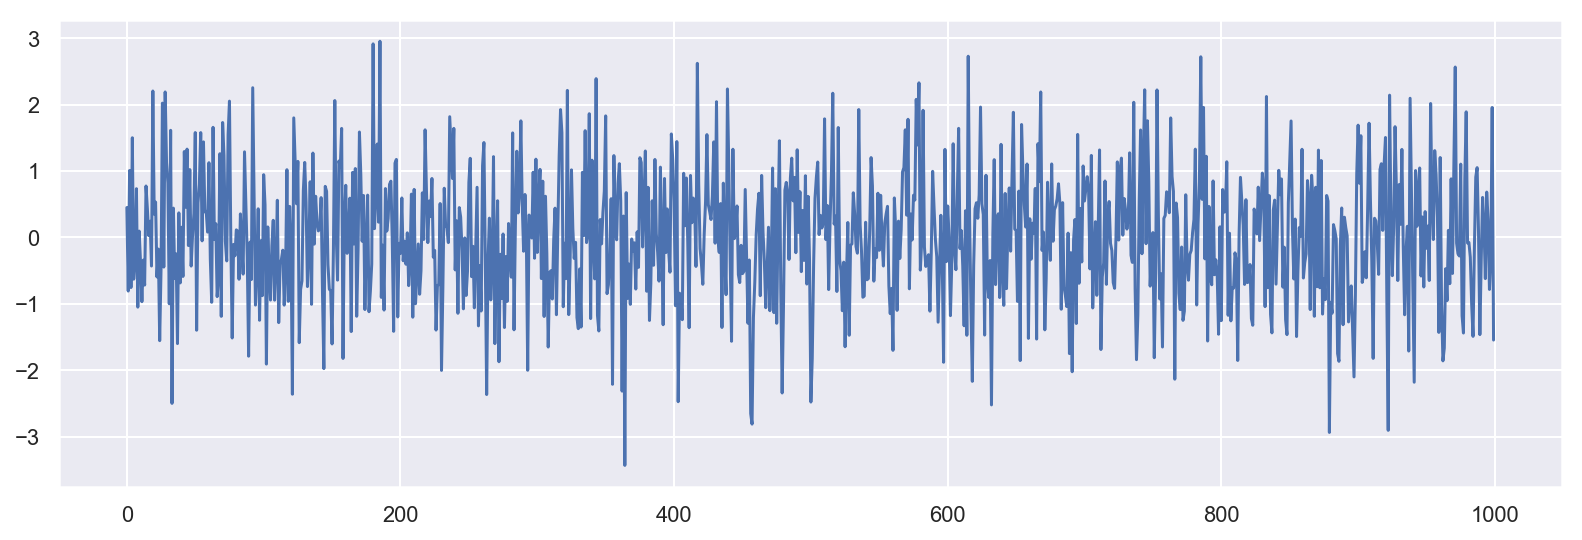

In [188]:
# Plotting white noise
rcParams['figure.figsize'] = 12, 4

white_noise = np.random.normal(loc=0, scale=1, size=1000) # loc is mean, scale is variance
plt.plot(white_noise)

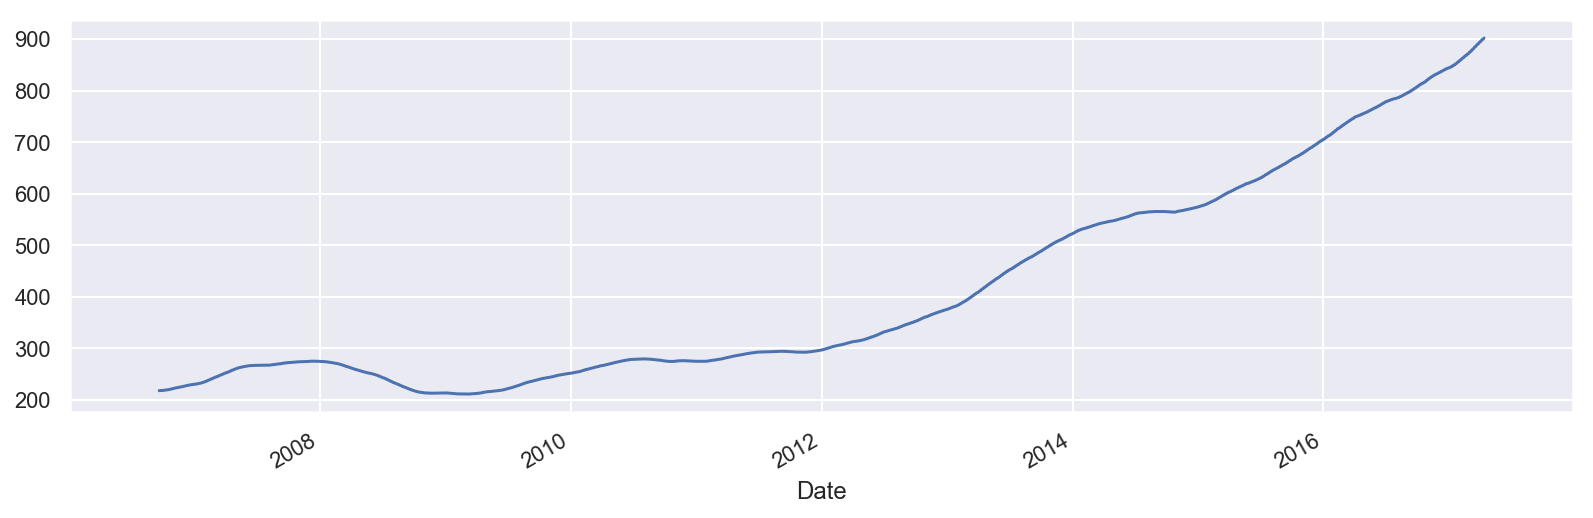

In [189]:
decomposed_gg_volume.trend.plot()

In [191]:
sim1=decomposed_gg_volume.resid.dropna()

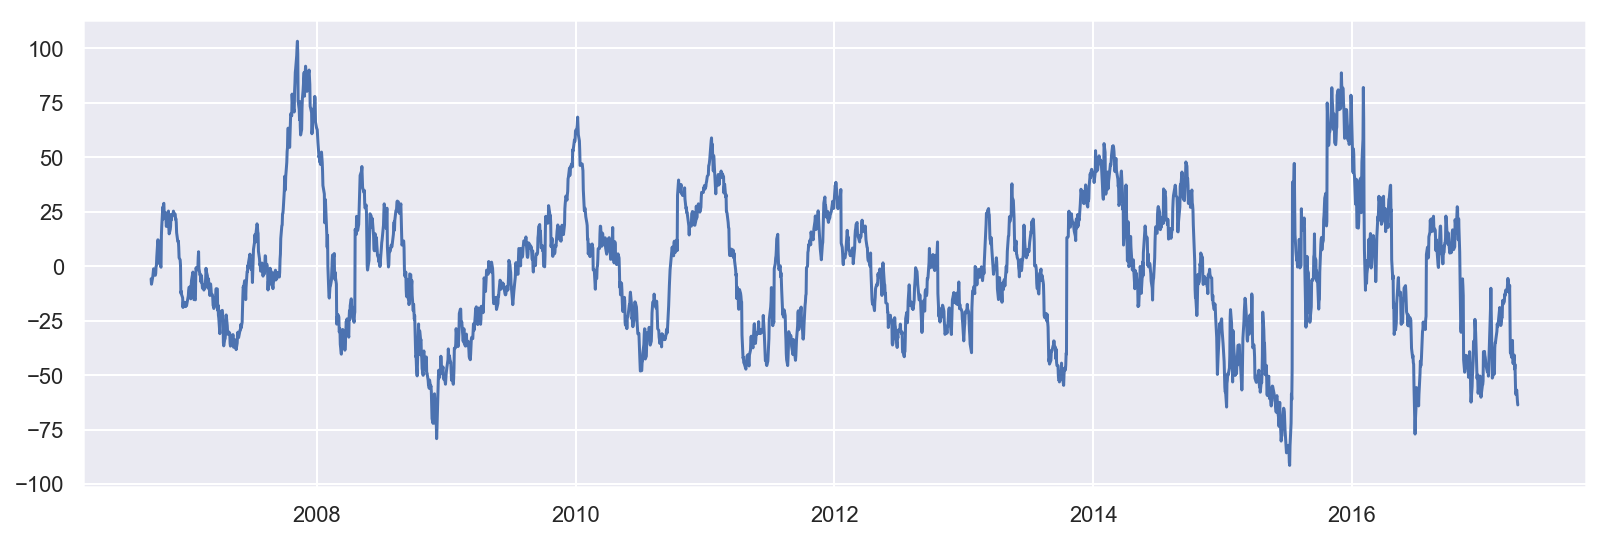

In [192]:
#rcParams['figure.figsize'] = 16, 12
#plt.subplot(4,1,1)
#ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
#ma1 = np.array([1])
#AR1 = ArmaProcess(ar1, ma1)
#sim1 = AR1.generate_sample(nsample=1000)
#plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)

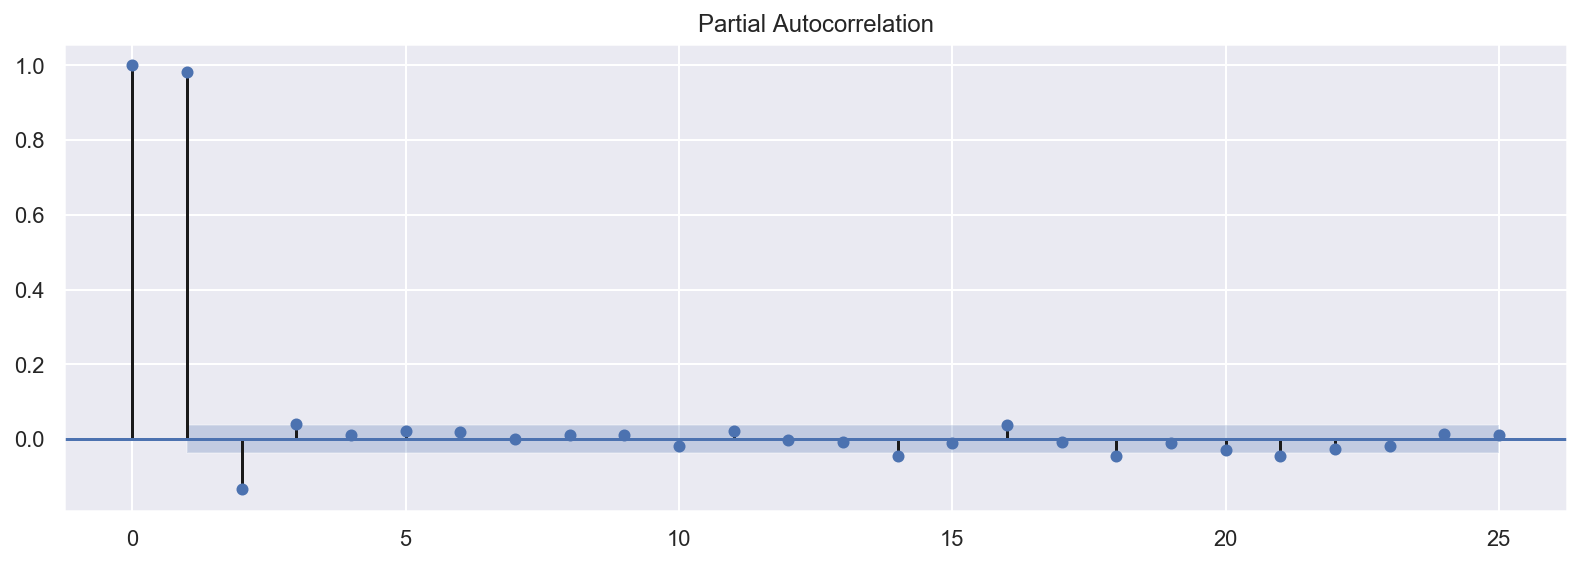

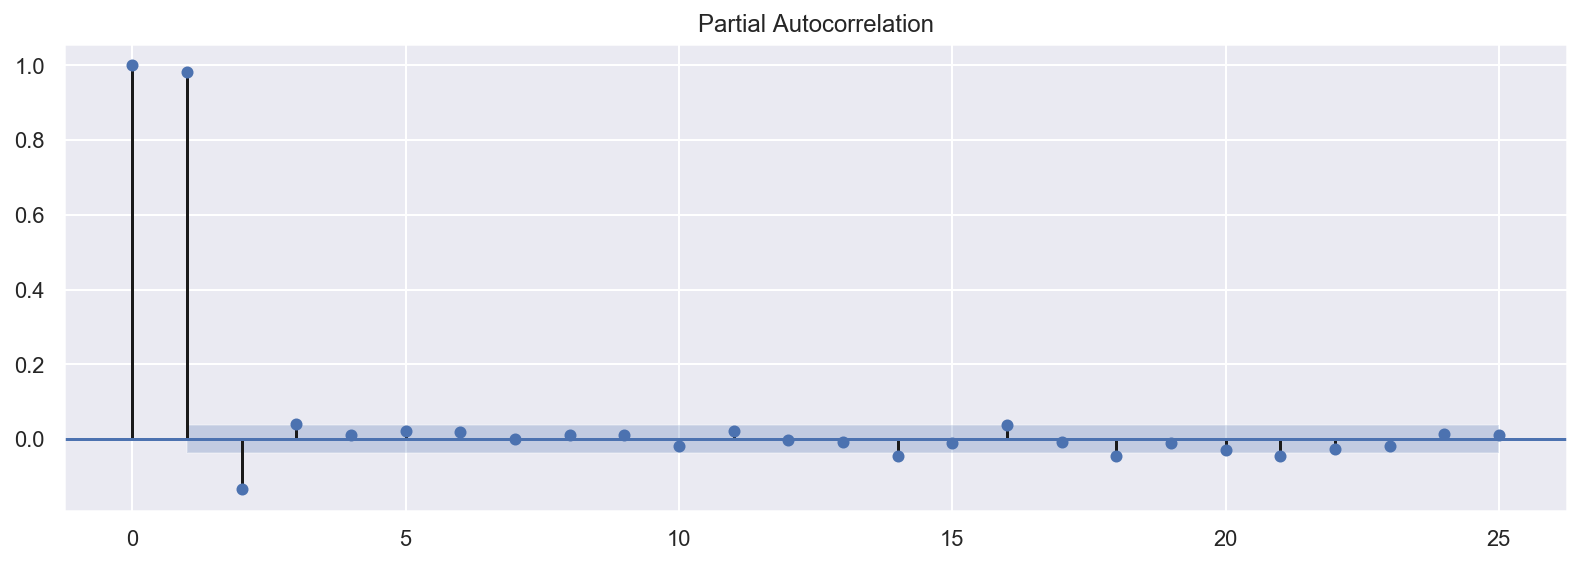

In [193]:
plot_pacf(sim1, lags=25)

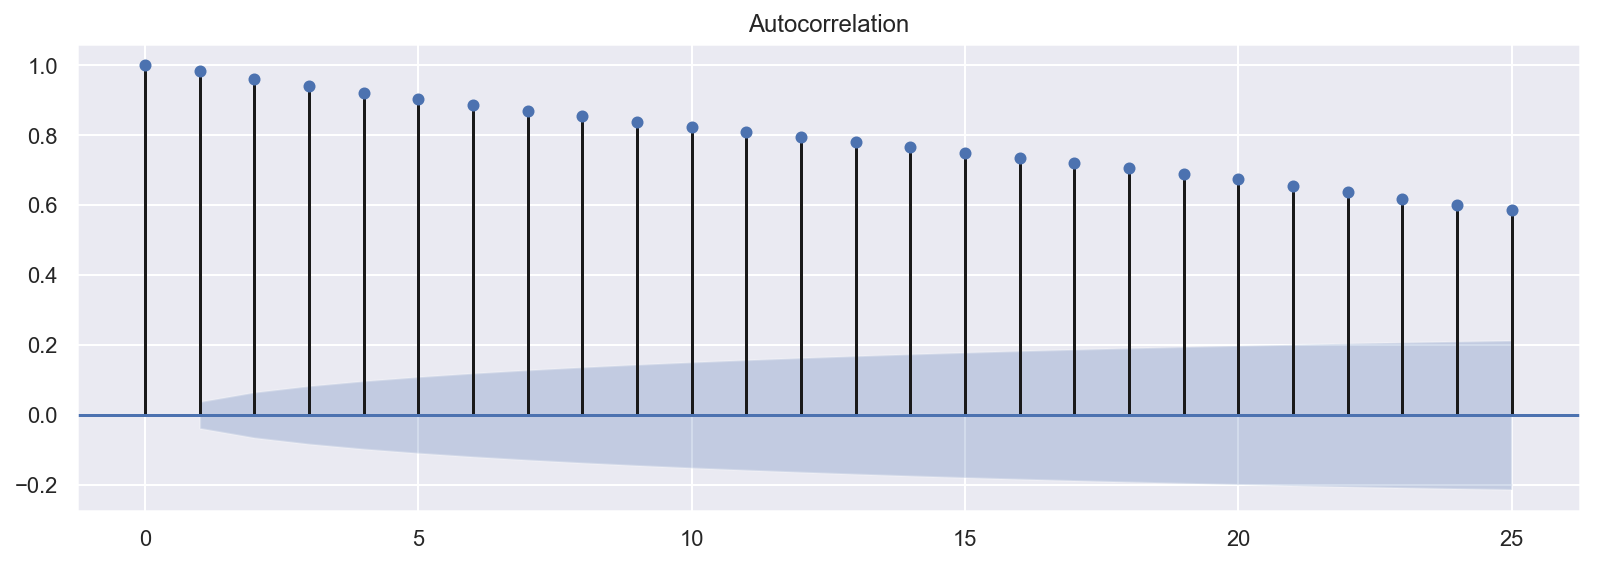

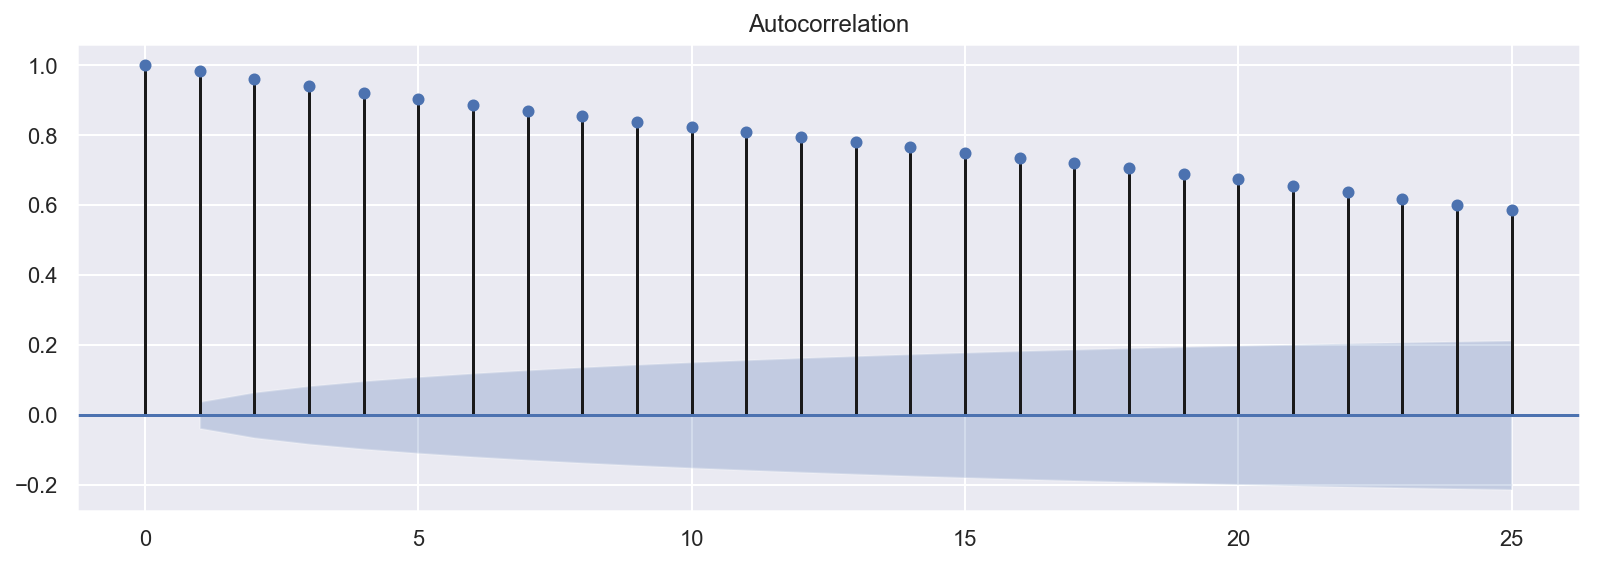

In [194]:
plot_acf(sim1, lags=25)

In [196]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(sim1, order=(2,0))
result = model.fit()
print(result.summary())
#print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                              ARMA Model Results                              
Dep. Variable:                   High   No. Observations:                 2659
Model:                     ARMA(2, 0)   Log Likelihood               -8394.289
Method:                       css-mle   S.D. of innovations              5.682
Date:                Tue, 18 Jun 2019   AIC                          16796.579
Time:                        22:44:35   BIC                          16820.121
Sample:                             0   HQIC                         16805.099
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8994      5.826     -0.498      0.619     -14.318       8.519
ar.L1.High     1.1192      0.019     58.287      0.000       1.082       1.157
ar.L2.High    -0.1378      0.019     -7.173      0.0

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



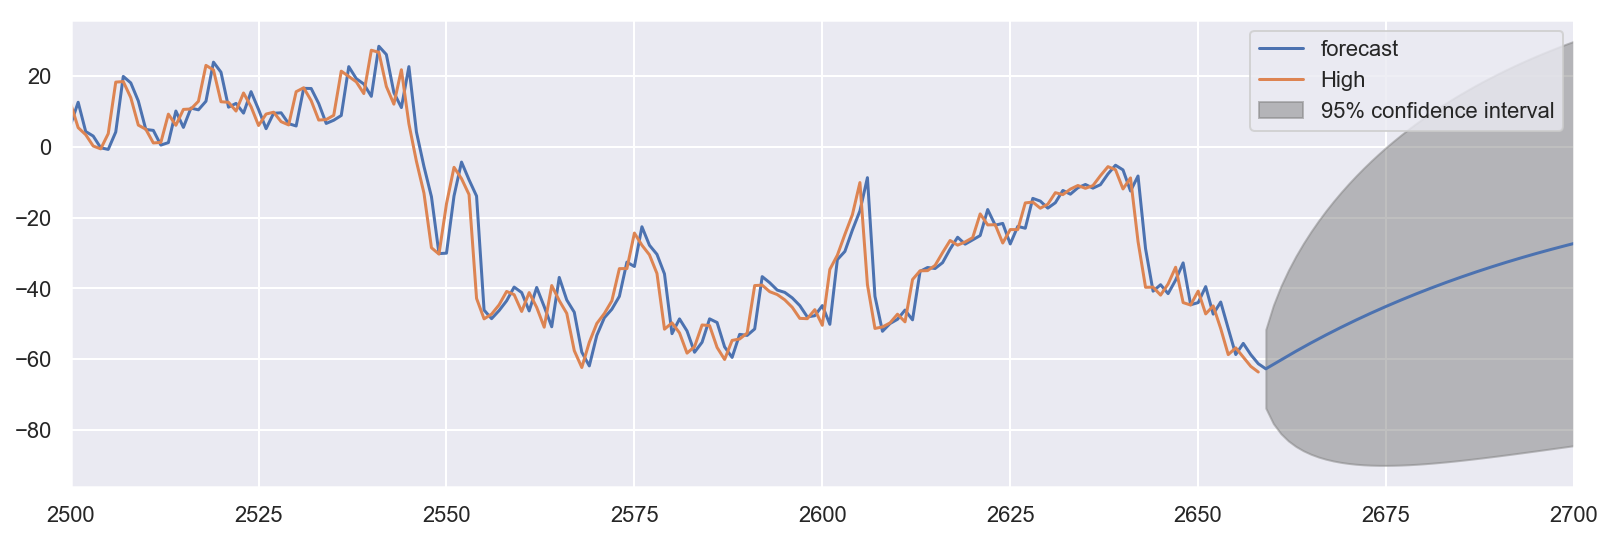

In [197]:
# Predicting simulated AR(1) model 
result.plot_predict(start=2500, end=2700)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3017
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -56385.467
Method:                       css-mle   S.D. of innovations       31647215.008
Date:                Tue, 18 Jun 2019   AIC                         112778.933
Time:                        22:45:10   BIC                         112802.981
Sample:                             1   HQIC                        112787.581
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9984.0302   2.48e+05      0.040      0.968   -4.75e+05    4.95e+05
ar.L1.D.y     -0.8716      0.016    -53.758      0.000      -0.903      -0.840
ar.L2.D.y     -0.4551      0.016    -28.071      0.0

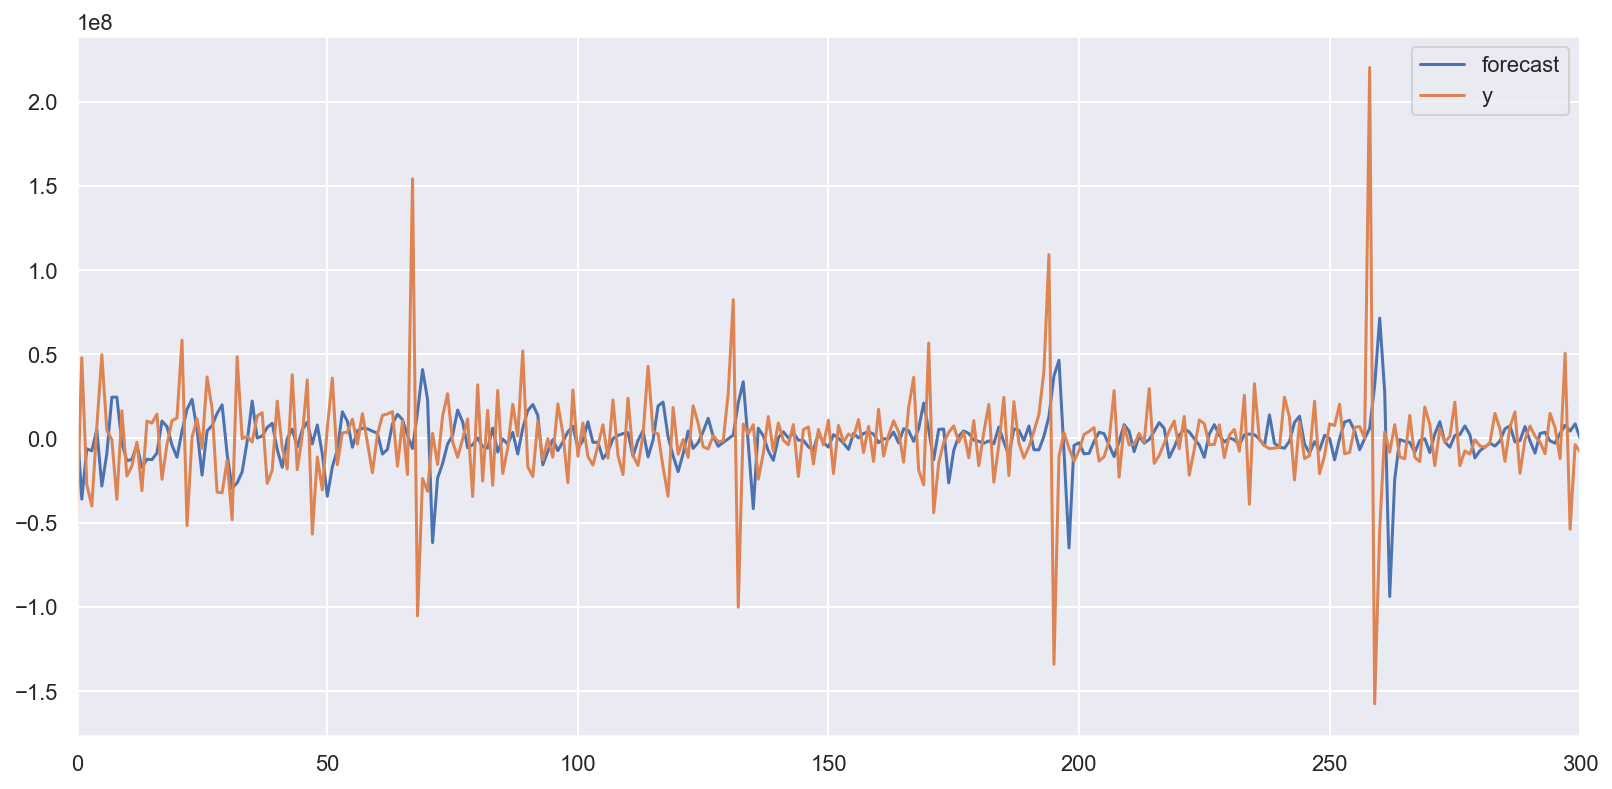

In [199]:
from statsmodels.tsa.arima_model import ARIMA

rcParams['figure.figsize'] = 12, 6
model = ARIMA(microsoft["Volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
plt.show()

In [202]:
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 61937614.65140498.
